In [ ]:
import os
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from joblib import dump
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Mount Google Drive to access dataset
drive.mount('/content/drive', force_remount=True)

# Set up directory path
file_path = '/content/drive/MyDrive/Dataset Personality/data-final.csv'

Mounted at /content/drive


In [ ]:
# Read CSV file into a Pandas DataFrame
df = pd.read_csv(file_path, sep='\t')

# Show the first 5 rows of the DataFrame
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [ ]:
# Drop columns from 51 onwards
df.drop(df.columns[50:], axis=1, inplace=True)

# Show the first 5 rows of the DataFrame
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [ ]:
# Count number of missing values in each column
num_missing = df.isnull().sum()

# Count number of rows with at least one missing value
num_rows_missing = df.isnull().any(axis=1).sum()

# Count total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate percentage of rows with at least one missing value
percent_rows_missing = (num_rows_missing / total_rows) * 100

print("\nNumber of rows with at least one missing value:", num_rows_missing)
print("Percentage of rows with at least one missing value: {:.2f}%".format(percent_rows_missing))


Number of rows with at least one missing value: 1783
Percentage of rows with at least one missing value: 0.18%


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Count number of missing values in each column
num_missing = df.isnull().sum()

# Count number of rows with at least one missing value
num_rows_missing = df.isnull().any(axis=1).sum()

print("Number of rows with at least one missing value:", num_rows_missing)

Number of rows with at least one missing value: 0


In [ ]:
# Convert all columns to integer
df = df.astype(int)

# Show the first 5 rows of the DataFrame
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,...,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,...,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,...,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,...,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,...,5,1,5,1,5,1,5,3,5,5


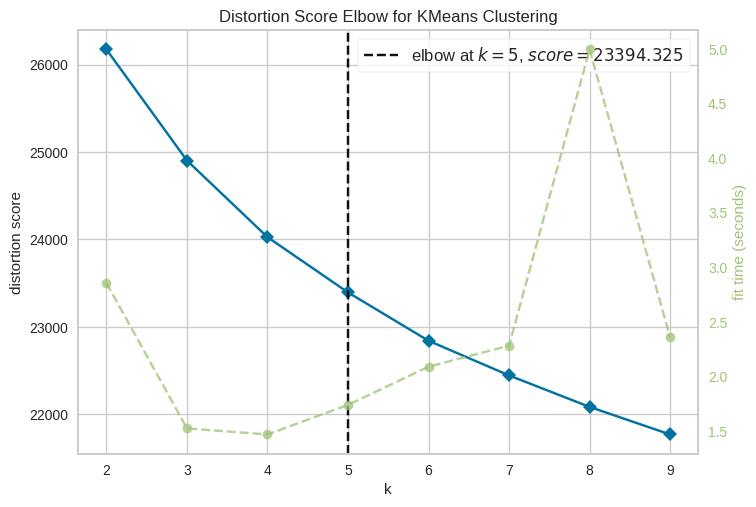

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_sample = df.iloc[:10000,:]
df_scaled = scaler.fit_transform(df_sample)
columns = df_sample.columns
df_scaled = pd.DataFrame(df_scaled, columns=columns)

# Visualize the elbow
kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_scaled)
visualizer.poof()

In [ ]:
# Fit KMeans model to the data
kmeans = KMeans(n_clusters=5, n_init=50)
kmeans.fit(df)

# Menyimpan model ke dalam file
dump(kmeans, 'model_kmeans.joblib')

['model_kmeans.joblib']

In [ ]:
# Assign the clusters to each data point
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,cluster
0,4,1,5,2,5,1,5,2,4,1,...,1,4,1,4,1,5,3,4,5,3
1,3,5,3,4,3,3,2,5,1,5,...,2,4,2,3,1,4,2,5,3,1
2,2,3,4,4,3,2,1,3,2,5,...,1,2,1,4,2,5,3,4,4,1
3,2,2,2,3,4,2,2,4,1,4,...,2,5,2,3,1,4,4,3,3,4
4,3,3,3,3,5,3,3,5,3,4,...,1,5,1,5,1,5,3,5,5,3
